In [675]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc , confusion_matrix, roc_auc_score


Importing test and train 

In [676]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train_data = train.drop(columns=[ 'Name', 'Cabin', 'Ticket'])
 #Dropped due to etrain_datacess null values and/or no relation to the survivability
test_data = test.drop(columns=[ 'Name', 'Cabin', 'Ticket'])
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Visualize the data

In [677]:
train_data.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


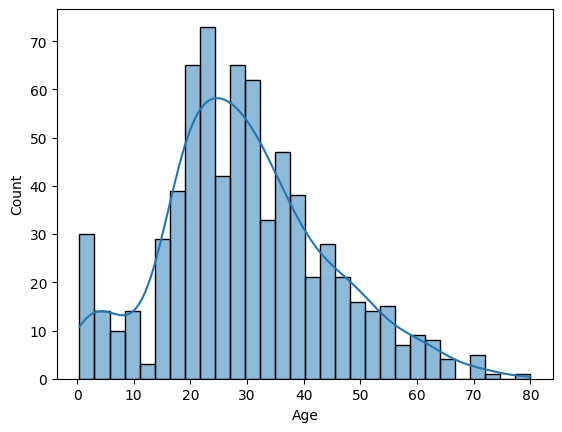

In [678]:
sns.histplot(train['Age'], bins=30, kde=True)
plt.show()


<Axes: xlabel='Embarked', ylabel='Count'>

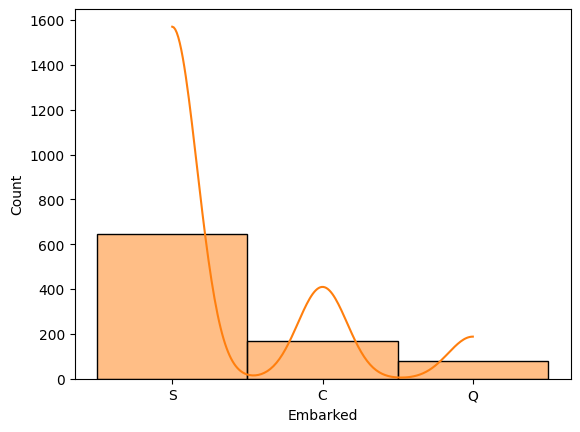

In [679]:
sns.histplot()
sns.histplot(train['Embarked'], bins=20, kde=True)

In [680]:
print("Number of missing values before imputing", train_data['Age'].isnull().sum())
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='median'))
])#pipeline to impute missing values with median of age
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('encoder', OrdinalEncoder())
])#categorical pipeline
train_data['Age'] = num_pipeline.fit_transform(train_data[['Age']])
print("After imputing we have ", train_data['Age'].isnull().sum(), " missing values")
print("Number of missing values in embarked column before imputing", train_data['Embarked'].isnull().sum())
train_data['Embarked'] = cat_pipeline.fit_transform(train_data[['Embarked']])
print("Number of missing values in embarked column after imputing", train_data['Embarked'].isnull().sum())
train_data.isnull().sum()

Number of missing values before imputing 177
After imputing we have  0  missing values
Number of missing values in embarked column before imputing 2
Number of missing values in embarked column after imputing 0


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [681]:
test_data.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

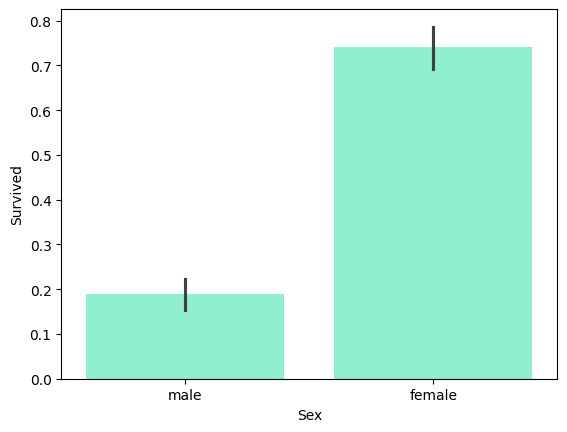

In [682]:
sns.barplot(x='Sex', y='Survived', data=train_data, color="aquamarine")
plt.show()

Converting all to numeric data type and making new variables


In [683]:
#1=travel together and 0 = travel together
train_copy = train_data.copy()
train_copy['Sib_Par_ch'] = np.where((train_data['SibSp']+train_data['Parch'])>0,1,0)
train_copy.drop('SibSp', axis=1, inplace=True)
train_copy.drop('Parch', axis=1, inplace=True)
train_copy.head()


,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Sib_Par_ch
0,1,0,3,male,22.0,7.2500,2.0,1
1,2,1,1,female,38.0,71.2833,0.0,1
2,3,1,3,female,26.0,7.9250,2.0,0
3,4,1,1,female,35.0,53.1000,2.0,1
4,5,0,3,male,35.0,8.0500,2.0,0


Categorical variables for test and train

In [684]:
final_train=pd.get_dummies(train_copy, columns=["Pclass","Embarked","Sex"],dtype=int)
final_train.drop('Sex_female', axis=1, inplace=True)
final_train.drop('PassengerId', axis=1, inplace=True)
final_train.head()

,Survived,Age,Fare,Sib_Par_ch,Pclass_1,Pclass_2,Pclass_3,Embarked_0.0,Embarked_1.0,Embarked_2.0,Sex_male
0,0,22.0,7.2500,1,0,0,1,0,0,1,1
1,1,38.0,71.2833,1,1,0,0,1,0,0,0
2,1,26.0,7.9250,0,0,0,1,0,0,1,0
3,1,35.0,53.1000,1,1,0,0,0,0,1,0
4,0,35.0,8.0500,0,0,0,1,0,0,1,1


Do the same to test data

In [685]:
test_data['Age'] = num_pipeline.fit_transform(test_data[['Age']])
test_data['Embarked'] = cat_pipeline.fit_transform(test_data[['Embarked']])
test_data['Fare'] = num_pipeline.fit_transform(test_data[['Fare']])
test_data.isnull().sum()
test_copy = test_data.copy()
test_copy['Sib_Par_ch'] = np.where((test_data['SibSp']+test_data['Parch'])>0,1,0)
test_copy.drop('SibSp', axis=1, inplace=True)
test_copy.drop('Parch', axis=1, inplace=True)
test_copy.head()
final_test=pd.get_dummies(test_copy, columns=["Pclass","Embarked","Sex"], dtype = int)
final_test.drop('Sex_female', axis=1, inplace=True)
final_test.drop('PassengerId', axis=1, inplace=True)

final_test.head()


,Age,Fare,Sib_Par_ch,Pclass_1,Pclass_2,Pclass_3,Embarked_0.0,Embarked_1.0,Embarked_2.0,Sex_male
0,34.5,7.8292,0,0,0,1,0,1,0,1
1,47.0,7.0000,1,0,0,1,0,0,1,0
2,62.0,9.6875,0,0,1,0,0,1,0,1
3,27.0,8.6625,0,0,0,1,0,0,1,1
4,22.0,12.2875,1,0,0,1,0,0,1,0


In [686]:
#there are outliers 
index_drop = final_train[(train['Fare']>290)&(train['Survived']>0.1)][['Fare','Survived']].index
index_drop
final_train = final_train.drop(index_drop)


Scaling and adjusting age

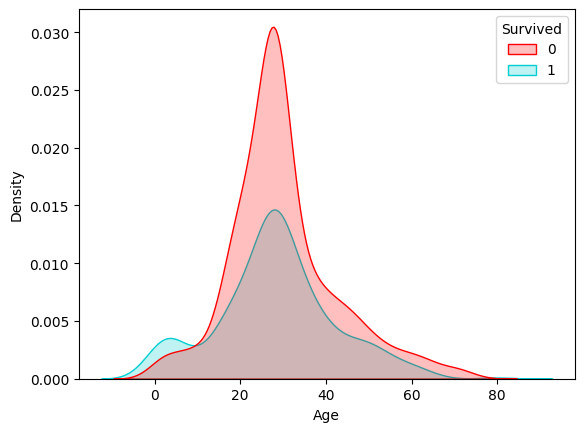

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [687]:
plot_data = train_data[['Age', 'Survived']]
farecomp = sns.kdeplot(data=plot_data, x='Age', hue='Survived', palette={1: "darkturquoise", 0: "red"}, fill=True)
# Show the plot
plt.show()
train['Age'].describe()


Classifying age

C:\Users\prana\AppData\Local\Temp\ipykernel_3928\1238169677.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = final_train.pivot_table(index="Age_categories",values='Survived')


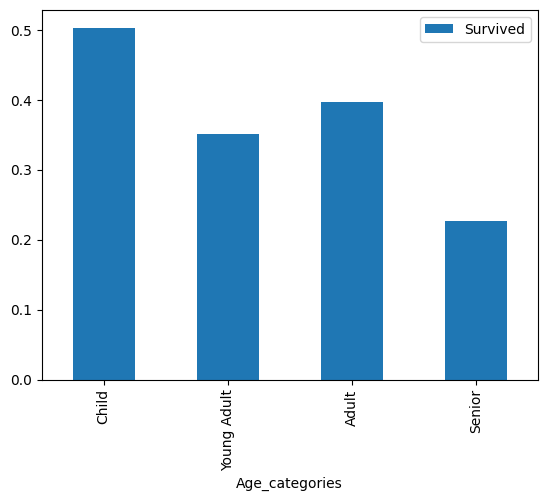

In [688]:
def process_age(samp,cut_points,label_names):
    samp["Age_categories"] = pd.cut(samp["Age"],cut_points,labels=label_names)
    return samp

cut_points = [0,18,35,60,100]
label_names = ["Child","Young Adult","Adult","Senior"]
final_train = process_age(final_train,cut_points,label_names)
final_test = process_age(final_test,cut_points,label_names)

pivot = final_train.pivot_table(index="Age_categories",values='Survived')
pivot.plot.bar()
final_train = pd.get_dummies(final_train,"Age_categories", dtype = int )
final_test = pd.get_dummies(final_test,"Age_categories", dtype = int )
final_test.drop(["Age"],inplace=True,axis=1)
final_train.drop(["Age"], inplace = True, axis = 1)


Logistic Regression Model Implementation

In [689]:
final_train.head()
lr = LogisticRegression(max_iter=1000)
columns = ['Fare','Sib_Par_ch','Pclass_1','Pclass_2','Pclass_3','Embarked_0.0','Embarked_1.0','Embarked_2.0','Sex_male','Age_categories_Child','Age_categories_Young Adult','Age_categories_Adult','Age_categories_Senior']
lr.fit(final_train[columns], final_train["Survived"])

LogisticRegression(max_iter=1000)

Validation set using scikit train_test split

In [690]:
X = final_train[columns]
y = final_train['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Testing new model on test train

In [691]:

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled,y_train)
predictor_lr = lr.predict(X_test_scaled)
print(accuracy_score(y_test,predictor_lr))
print(classification_report(y_test,predictor_lr))
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]


0.8146067415730337
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       104
           1       0.78      0.77      0.78        74

    accuracy                           0.81       178
   macro avg       0.81      0.81      0.81       178
weighted avg       0.81      0.81      0.81       178



K_fold cross validation

In [692]:
scores = cross_val_score(lr, X, y, cv=10)
accuracy = scores.mean()
print(scores)
print(accuracy)

[0.7752809  0.78651685 0.7752809  0.86516854 0.7752809  0.78651685
 0.78651685 0.78651685 0.81818182 0.79545455]
0.7950715015321757


Using Random Forest

In [693]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
predictor_rf = rf_clf.predict(X_test) 
print(accuracy_score(y_test,predictor_rf))
print(classification_report(y_test,predictor_rf))
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]



0.8314606741573034
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       104
           1       0.81      0.78      0.79        74

    accuracy                           0.83       178
   macro avg       0.83      0.82      0.83       178
weighted avg       0.83      0.83      0.83       178



Comparing both models using ROC curves

In [694]:

# Function to plot ROC curves
def plot_roc_curves(y_test, y_prob_lr, y_prob_rf):
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
    
    plt.figure(figsize=(10, 6))
    plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_lr):.2f})')
    plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid()
    plt.show()

# Function to plot confusion matrices
def plot_confusion_matrices(y_test, y_pred_lr, y_pred_rf):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Logistic Regression Confusion Matrix
    sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', ax=axes[0], cmap='Blues')
    axes[0].set_title('Logistic Regression Confusion Matrix')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Actual')
    
    # Random Forest Confusion Matrix
    sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', ax=axes[1], cmap='Blues')
    axes[1].set_title('Random Forest Confusion Matrix')
    axes[1].set_xlabel('Predicted')
    axes[1].set_ylabel('Actual')
    
    plt.tight_layout()
    plt.show()

# Function to plot feature importances
def plot_feature_importances(importances, columns):
    indices = importances.argsort()[::-1]
    
    plt.figure(figsize=(10, 6))
    plt.title('Feature Importances (Random Forest)')
    plt.bar(range(len(columns)), importances[indices], align='center')
    plt.xticks(range(len(columns)), [columns[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

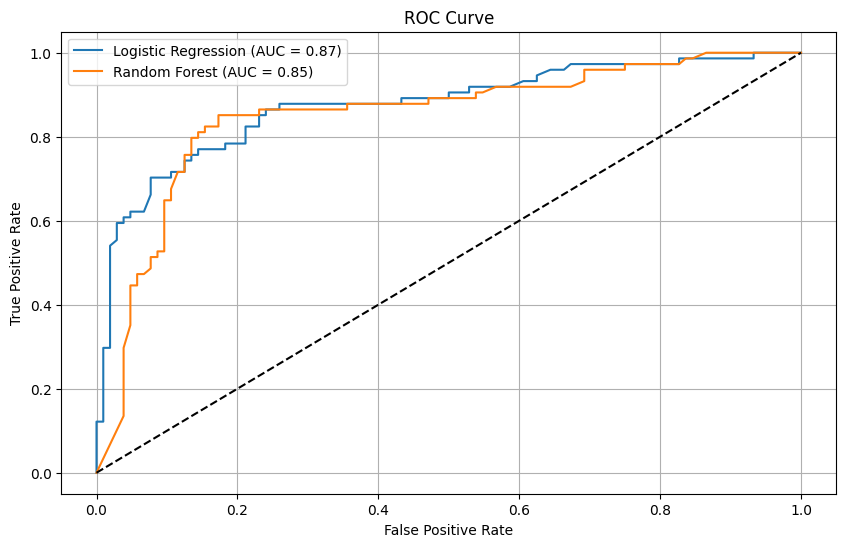

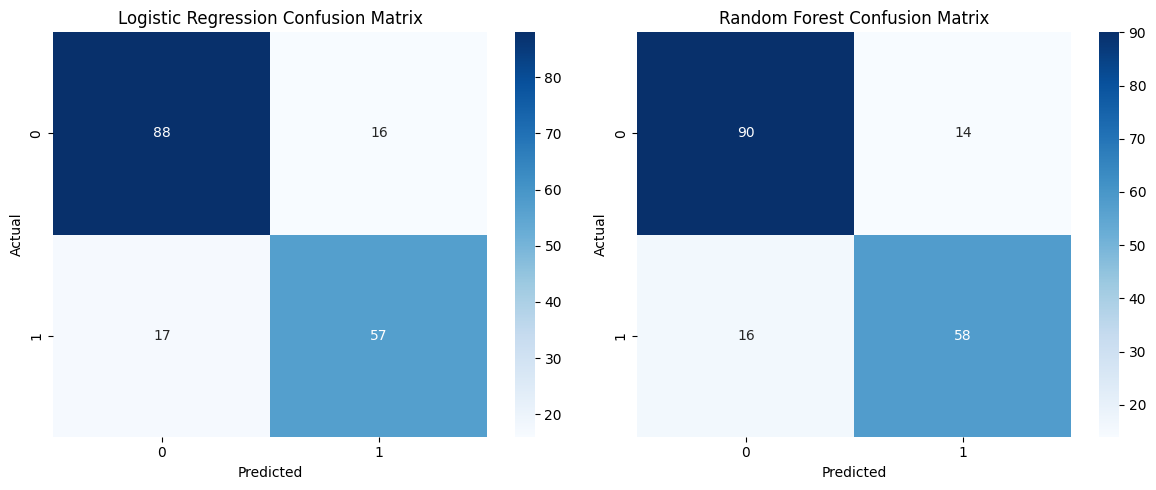

In [695]:
# Plot ROC curves
plot_roc_curves(y_test, y_prob_lr, y_prob_rf)
# Plot confusion matrices
plot_confusion_matrices(y_test, predictor_lr, predictor_rf)

Making final predictions on test data

In [696]:
final_test['Survived'] = rf_clf.predict(final_test)
final_test['PassengerId'] = test['PassengerId']
# Prepare the submission DataFrame
submission = final_test[['PassengerId', 'Survived']]

submission.to_csv("submission.csv", index=False)

print(submission.tail())


     PassengerId  Survived
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0
